In [47]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Read the dataset
df = pd.read_csv('airline_delay.csv')

# Display the first few rows of the dataset
print(df.head(10))


   year  month carrier       carrier_name airport  \
0  2020     12      9E  Endeavor Air Inc.     ABE   
1  2020     12      9E  Endeavor Air Inc.     ABY   
2  2020     12      9E  Endeavor Air Inc.     AEX   
3  2020     12      9E  Endeavor Air Inc.     AGS   
4  2020     12      9E  Endeavor Air Inc.     ALB   
5  2020     12      9E  Endeavor Air Inc.     ATL   
6  2020     12      9E  Endeavor Air Inc.     ATW   
7  2020     12      9E  Endeavor Air Inc.     AVL   
8  2020     12      9E  Endeavor Air Inc.     AZO   
9  2020     12      9E  Endeavor Air Inc.     BDL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         44.0        3.0   
1             Albany, GA: Southwest Georgia Regional         90.0        1.0   
2           Alexandria, LA: Alexandria International         88.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field        184.0        9.0   
4               

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 3351 non-null   int64  
 1   month                3351 non-null   int64  
 2   carrier              3351 non-null   object 
 3   carrier_name         3351 non-null   object 
 4   airport              3351 non-null   object 
 5   airport_name         3351 non-null   object 
 6   arr_flights          3343 non-null   float64
 7   arr_del15            3343 non-null   float64
 8   carrier_ct           3343 non-null   float64
 9   weather_ct           3343 non-null   float64
 10  nas_ct               3343 non-null   float64
 11  security_ct          3343 non-null   float64
 12  late_aircraft_ct     3343 non-null   float64
 13  arr_cancelled        3343 non-null   float64
 14  arr_diverted         3343 non-null   float64
 15  arr_delay            3343 non-null   f

In [49]:
df.isna().sum() / df.shape[0]


year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.002387
arr_del15              0.002387
carrier_ct             0.002387
weather_ct             0.002387
nas_ct                 0.002387
security_ct            0.002387
late_aircraft_ct       0.002387
arr_cancelled          0.002387
arr_diverted           0.002387
arr_delay              0.002387
carrier_delay          0.002387
weather_delay          0.002387
nas_delay              0.002387
security_delay         0.002387
late_aircraft_delay    0.002387
dtype: float64

In [50]:
print(df.describe())

              year   month   arr_flights    arr_del15   carrier_ct  \
count  3351.000000  3351.0   3343.000000  3343.000000  3343.000000   
mean   2019.459266    12.0    298.271014    50.995214    16.065337   
std       0.498412     0.0    852.436335   146.484456    41.759516   
min    2019.000000    12.0      1.000000     0.000000     0.000000   
25%    2019.000000    12.0     35.000000     5.000000     1.490000   
50%    2019.000000    12.0     83.000000    12.000000     4.750000   
75%    2020.000000    12.0    194.500000    33.000000    12.255000   
max    2020.000000    12.0  19713.000000  2289.000000   697.000000   

        weather_ct       nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  3343.000000  3343.000000  3343.000000       3343.000000    3343.000000   
mean      1.443144    16.183383     0.137320         17.166069       2.884535   
std       4.821657    56.423008     0.646479         55.447043      10.126658   
min       0.000000     0.000000     0.000000 

In [51]:
# Data exploration

print('Shape of the DataFrame (rows/columns):', df.shape)

Shape of the DataFrame (rows/columns): (3351, 21)


In [52]:
print('With Null Values:', df.shape)
df = df.dropna()
print('Without Null Values:', df.shape)

With Null Values: (3351, 21)
Without Null Values: (3343, 21)


In [53]:
# Trends over time
df_time = df[['year', 'month', 'arr_flights', 'arr_del15', 'arr_delay']].copy()
df_time.head(10)

,year,month,arr_flights,arr_del15,arr_delay
0,2020,12,44.0,3.0,89.0
1,2020,12,90.0,1.0,23.0
2,2020,12,88.0,8.0,338.0
3,2020,12,184.0,9.0,508.0
4,2020,12,76.0,11.0,692.0
5,2020,12,5985.0,445.0,30756.0
6,2020,12,142.0,14.0,436.0
7,2020,12,147.0,10.0,1070.0
8,2020,12,84.0,14.0,2006.0
9,2020,12,150.0,19.0,846.0


In [54]:
print(df.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [55]:
#percentage of deLayed flights
df_december_2019 = df_time[(df_time['year'] == 2019)]
df_december_2020 = df_time[(df_time['year'] == 2020)]

# Total number of flights and delayed flights for each year
total_flights_2019 = df_december_2019['arr_flights'].sum()
total_delays_2019 = df_december_2019['arr_del15'].sum()
total_flights_2020 = df_december_2020['arr_flights'].sum()
total_delays_2020 = df_december_2020['arr_del15'].sum()

# Percentage of delayed flights for each year
percentage_delayed_2019 = (total_delays_2019 / total_flights_2019) * 100
percentage_delayed_2020 = (total_delays_2020 / total_flights_2020) * 100

# Results
print(f"Percentage of Delayed Flights in 2019: {percentage_delayed_2019:.2f}%")
print(f"Percentage of Delayed Flights in 2020: {percentage_delayed_2020:.2f}%")

Percentage of Delayed Flights in 2019: 20.29%
Percentage of Delayed Flights in 2020: 11.72%


In [56]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column}: {df[column].unique()}")


carrier: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'YX' 'UA'
 'WN' 'YV' 'EV']

carrier_name: ['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'Frontier Airlines Inc.'
 'Allegiant Air' 'Hawaiian Airlines Inc.' 'Envoy Air' 'Spirit Air Lines'
 'PSA Airlines Inc.' 'SkyWest Airlines Inc.' 'Republic Airline'
 'United Air Lines Inc.' 'Southwest Airlines Co.' 'Mesa Airlines Inc.'
 'ExpressJet Airlines LLC']

airport: ['ABE' 'ABY' 'AEX' 'AGS' 'ALB' 'ATL' 'ATW' 'AVL' 'AZO' 'BDL' 'BHM' 'BIS'
 'BMI' 'BNA' 'BOS' 'BQK' 'BTR' 'BTV' 'BUF' 'BWI' 'CAE' 'CHA' 'CHO' 'CHS'
 'CID' 'CLE' 'CLT' 'CMH' 'CRW' 'CSG' 'CVG' 'CWA' 'DAL' 'DAY' 'DCA' 'DFW'
 'DHN' 'DLH' 'DSM' 'DTW' 'ECP' 'ELM' 'EVV' 'EWR' 'FAR' 'FAY' 'FLL' 'FSD'
 'FWA' 'GFK' 'GNV' 'GPT' 'GRB' 'GRR' 'GSO' 'GSP' 'GTR' 'HOU' 'HSV' 'IAD'
 'ICT' 'ILM' 'IND' 'JAN' 'JAX' 'JFK' 'LAN' 'LEX' 'LFT' 'LGA' 'LIT' 'MBS'
 'MCI' 'MCO' 'MDT' 'MEM' 'MGM' 'MIA' 'MKE' 'MLI' 'MLU' 'MOB' 'MOT' 

In [57]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column}: {df[column].unique()}")


carrier: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'YX' 'UA'
 'WN' 'YV' 'EV']

carrier_name: ['Endeavor Air Inc.' 'American Airlines Inc.' 'Alaska Airlines Inc.'
 'JetBlue Airways' 'Delta Air Lines Inc.' 'Frontier Airlines Inc.'
 'Allegiant Air' 'Hawaiian Airlines Inc.' 'Envoy Air' 'Spirit Air Lines'
 'PSA Airlines Inc.' 'SkyWest Airlines Inc.' 'Republic Airline'
 'United Air Lines Inc.' 'Southwest Airlines Co.' 'Mesa Airlines Inc.'
 'ExpressJet Airlines LLC']

airport: ['ABE' 'ABY' 'AEX' 'AGS' 'ALB' 'ATL' 'ATW' 'AVL' 'AZO' 'BDL' 'BHM' 'BIS'
 'BMI' 'BNA' 'BOS' 'BQK' 'BTR' 'BTV' 'BUF' 'BWI' 'CAE' 'CHA' 'CHO' 'CHS'
 'CID' 'CLE' 'CLT' 'CMH' 'CRW' 'CSG' 'CVG' 'CWA' 'DAL' 'DAY' 'DCA' 'DFW'
 'DHN' 'DLH' 'DSM' 'DTW' 'ECP' 'ELM' 'EVV' 'EWR' 'FAR' 'FAY' 'FLL' 'FSD'
 'FWA' 'GFK' 'GNV' 'GPT' 'GRB' 'GRR' 'GSO' 'GSP' 'GTR' 'HOU' 'HSV' 'IAD'
 'ICT' 'ILM' 'IND' 'JAN' 'JAX' 'JFK' 'LAN' 'LEX' 'LFT' 'LGA' 'LIT' 'MBS'
 'MCI' 'MCO' 'MDT' 'MEM' 'MGM' 'MIA' 'MKE' 'MLI' 'MLU' 'MOB' 'MOT' 

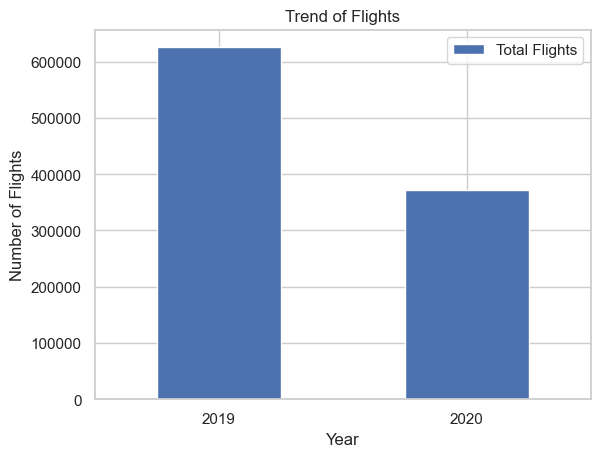

In [58]:
# flight per year
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('airline_delay.csv')
flight_trend = df.groupby(['year'])['arr_flights'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Flights')
plt.title('Trend of Flights')
plt.legend(['Total Flights'])
plt.grid(True)
plt.show()


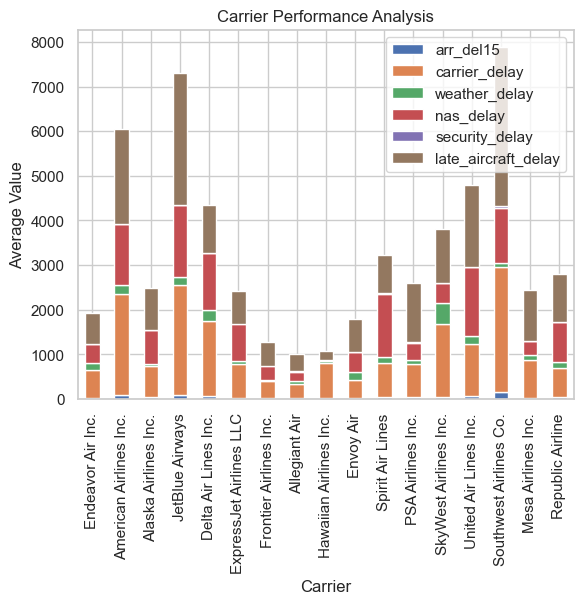

In [59]:
# Carrier Performance Analysis
cols = ['carrier', 'carrier_name', 'arr_del15', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df = df[cols]

carrier_performance = df.groupby(['carrier', 'carrier_name']).mean().reset_index()
carrier_performance.plot(x='carrier_name', kind='bar', stacked=True)
plt.xlabel('Carrier')
plt.ylabel('Average Value')
plt.title('Carrier Performance Analysis')
plt.legend(loc='upper right')
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_5900\1374374317.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Percentage of Delayed Flights', data=df_percentages, palette="plasma")


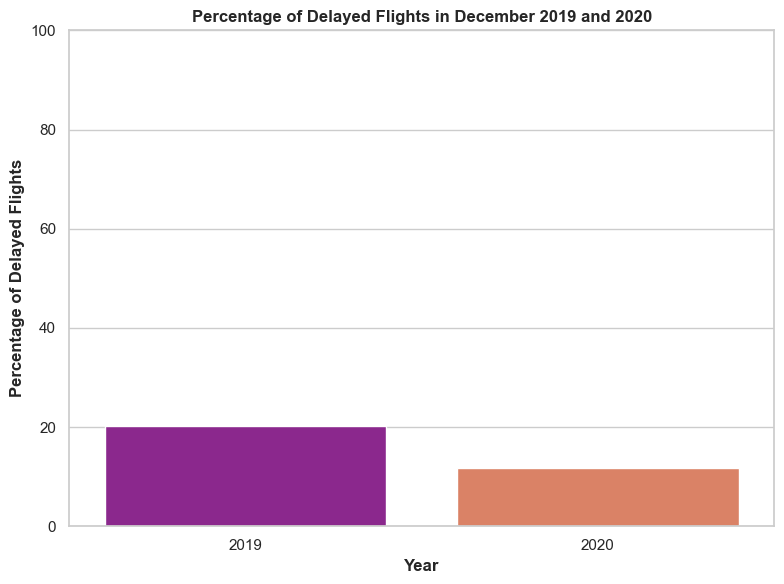

In [60]:
data = {'Year': [2019, 2020], 'Percentage of Delayed Flights': [percentage_delayed_2019, percentage_delayed_2020]}
df_percentages = pd.DataFrame(data)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Percentage of Delayed Flights', data=df_percentages, palette="plasma")
plt.title('Percentage of Delayed Flights in December 2019 and 2020', fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Percentage of Delayed Flights', fontweight = 'bold')
plt.ylim(0, 100)  

plt.tight_layout()
plt.show()

In [74]:
import pandas as pd

# Reload your dataset
df = pd.read_csv('airline_delay.csv')

# Print all column names
for column in df.columns:
    print(column)

year
month
carrier
carrier_name
airport
airport_name
arr_flights
arr_del15
carrier_ct
weather_ct
nas_ct
security_ct
late_aircraft_ct
arr_cancelled
arr_diverted
arr_delay
carrier_delay
weather_delay
nas_delay
security_delay
late_aircraft_delay


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


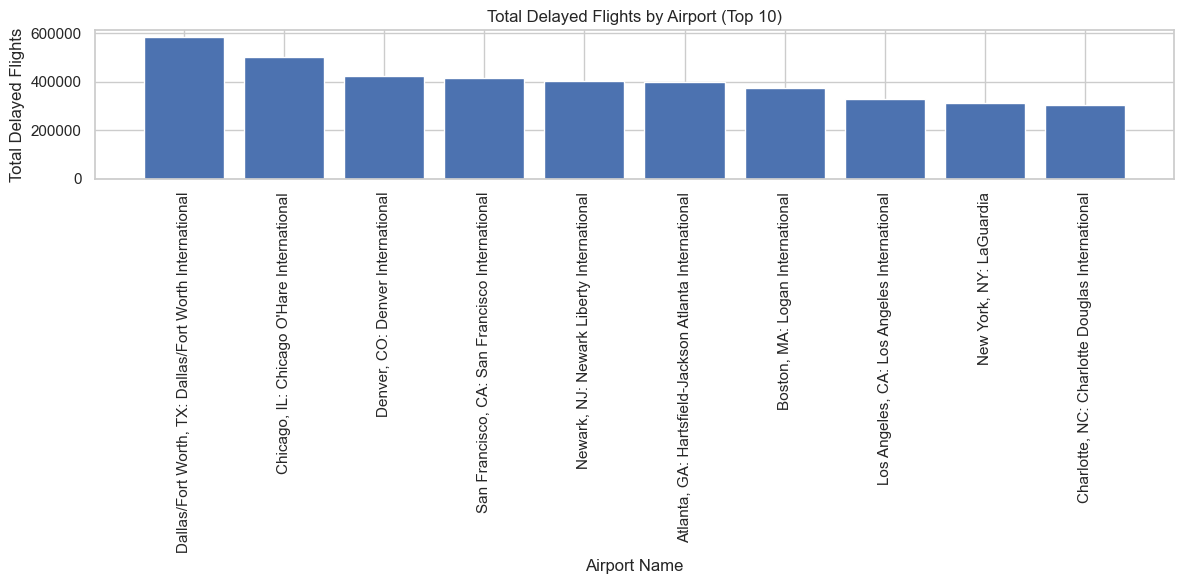

In [80]:
# df.columns = df.columns.str.strip()
print(df.columns)
# flights delayed by airport
airport_summary = df.groupby(['airport', 'airport_name']).agg(
    total_arrivals=('arr_flights', 'sum'),
    total_delay_time=('arr_delay', 'sum'),
    avg_carrier_delay=('carrier_delay', 'mean'),
    avg_weather_delay=('weather_delay', 'mean'),
    avg_nas_delay=('nas_delay', 'mean'),
    avg_security_delay=('security_delay', 'mean'),
    avg_late_aircraft_delay=('late_aircraft_delay', 'mean')
).reset_index().sort_values(by='total_delay_time', ascending=False)

# top 10 airports with the most delayed flights
top_10_airports = airport_summary.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_airports['airport_name'], top_10_airports['total_delay_time'])
plt.title('Total Delayed Flights by Airport (Top 10)')
plt.xlabel('Airport Name')
plt.ylabel('Total Delayed Flights')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

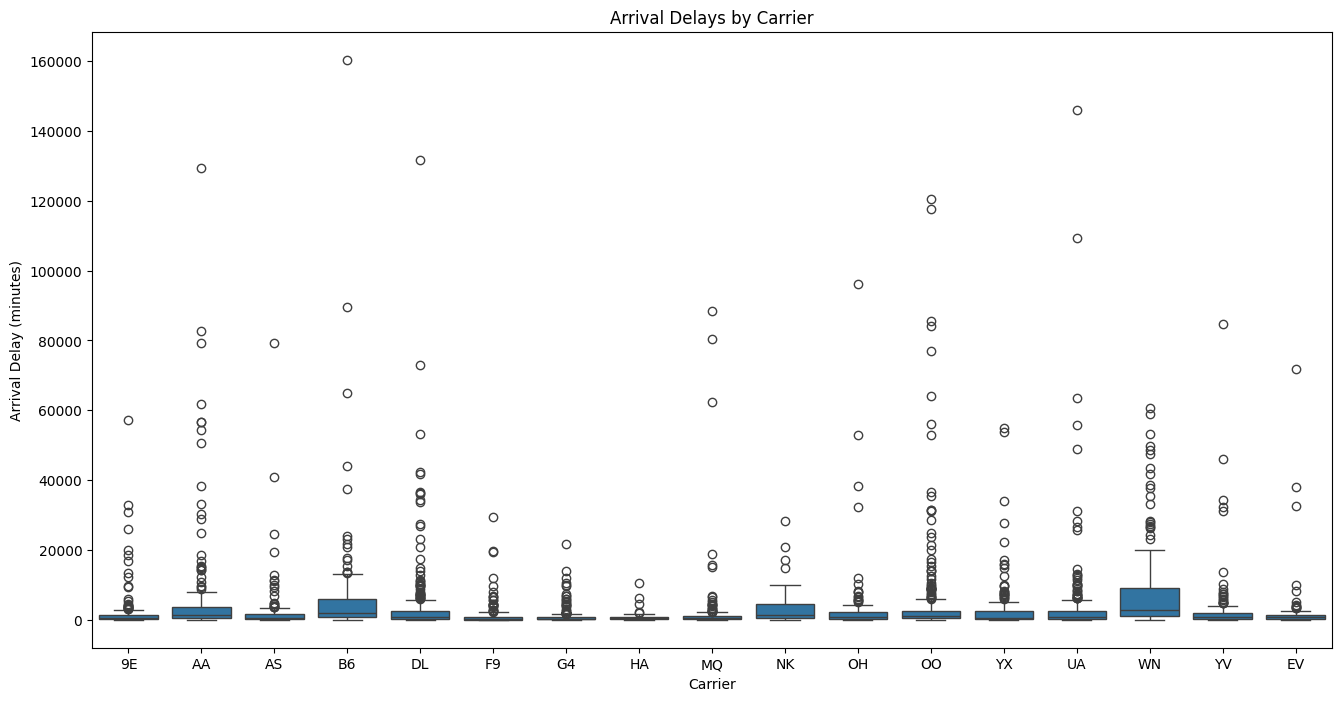

In [ ]:
# Explore delays by carrier
plt.figure(figsize=(16, 8))
sns.boxplot(x='carrier', y='arr_delay', data=df)
plt.title('Arrival Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


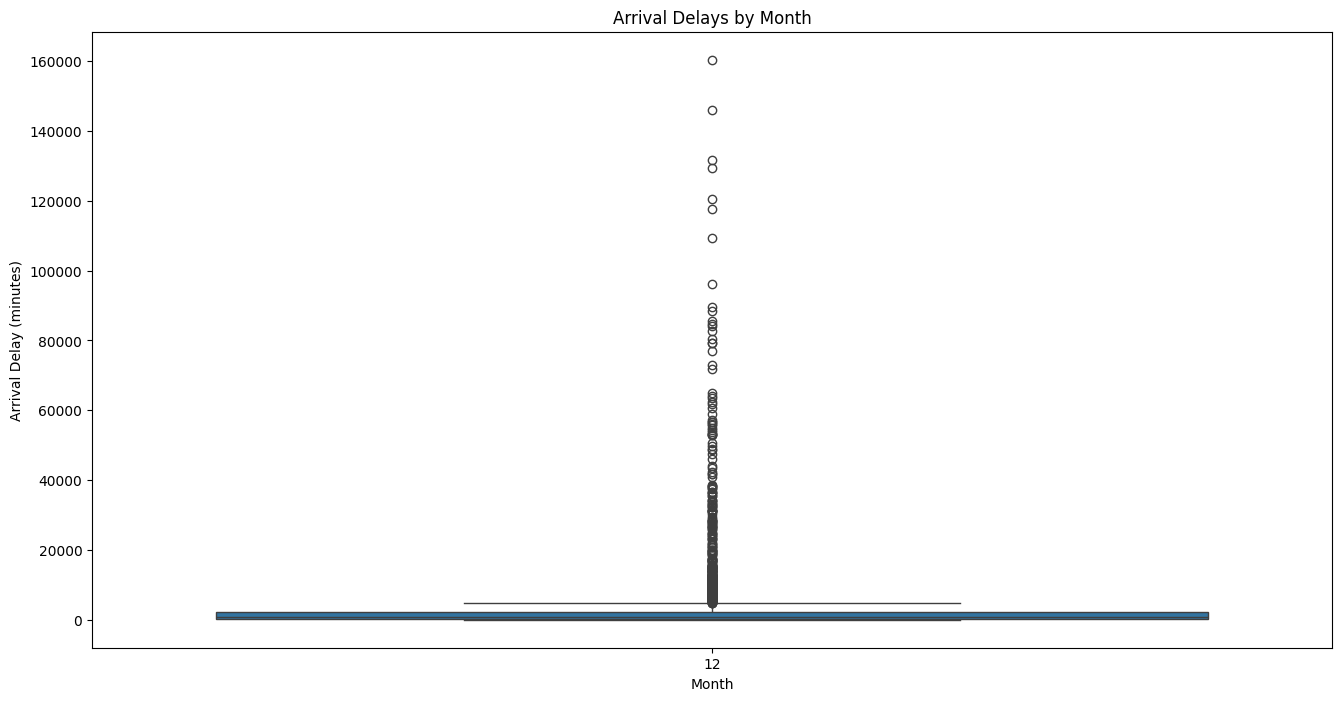

In [ ]:
# delays by month
plt.figure(figsize=(16, 8))
sns.boxplot(x='month', y='arr_delay', data=df)
plt.title('Arrival Delays by Month')
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

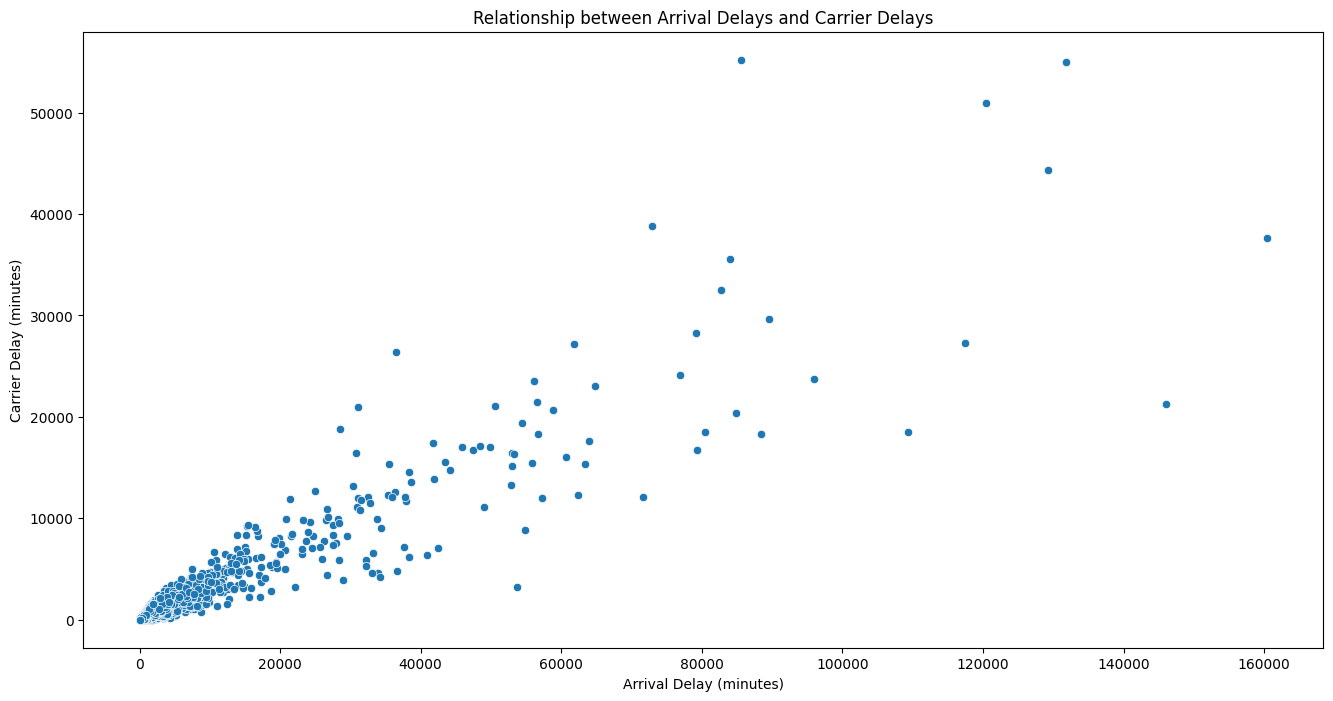

In [ ]:
#Relationship between Arrival Delays and Carrier Delays
plt.figure(figsize=(16, 8))
sns.scatterplot(x='arr_delay', y='carrier_delay', data=df)
plt.title('Relationship between Arrival Delays and Carrier Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Carrier Delay (minutes)')
plt.show()

In [ ]:
# total delay time in hours
total_delay_2019_hours = df_time[df_time['year'] == 2019]['arr_delay'].sum() / 60
print(f'Total delay time in 2019: {int(total_delay_2019_hours)} hours')

total_delay_2020_hours = df_time[df_time['year'] == 2020]['arr_delay'].sum() / 60
print(f'Total delay time in 2020: {int(total_delay_2020_hours)} hours')

Total delay time in 2019: 143073 hours
Total delay time in 2020: 42678 hours


C:\Users\S\AppData\Local\Temp\ipykernel_18420\202855358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total Delay (Hours)', data=df_delay, palette="viridis")


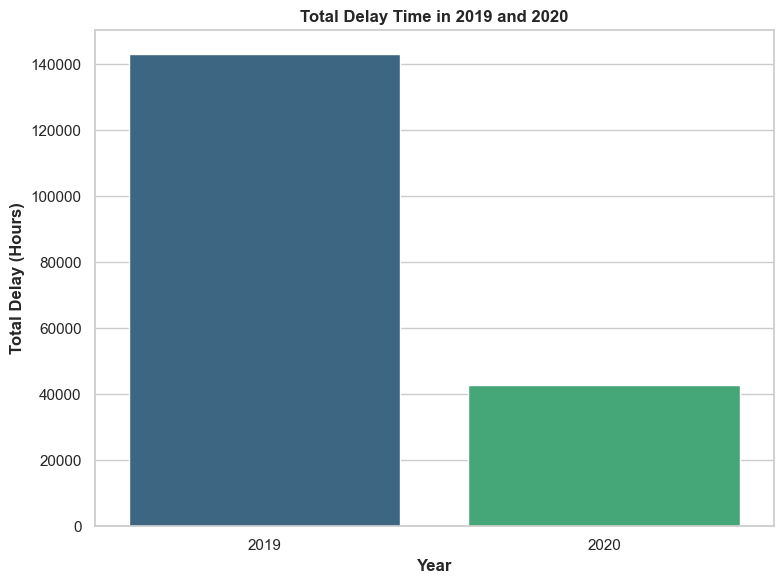

In [ ]:
# delay time plotting
data_delay = {'Year': [2019, 2020], 'Total Delay (Hours)': [total_delay_2019_hours, total_delay_2020_hours]}
df_delay = pd.DataFrame(data_delay)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Total Delay (Hours)', data=df_delay, palette="viridis")
plt.title('Total Delay Time in 2019 and 2020', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Delay (Hours)', fontweight='bold')

plt.tight_layout()
plt.show()

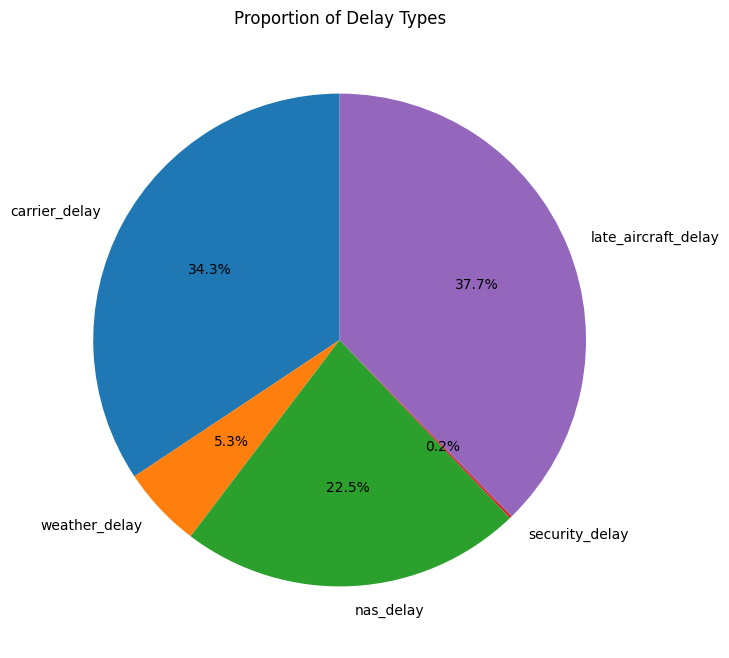

In [ ]:
#Proportion of Delay Types
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

df_delay_types = df[delay_columns].sum()

plt.figure(figsize=(12, 8))
df_delay_types.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Delay Types')
plt.show()

<Figure size 1600x800 with 0 Axes>

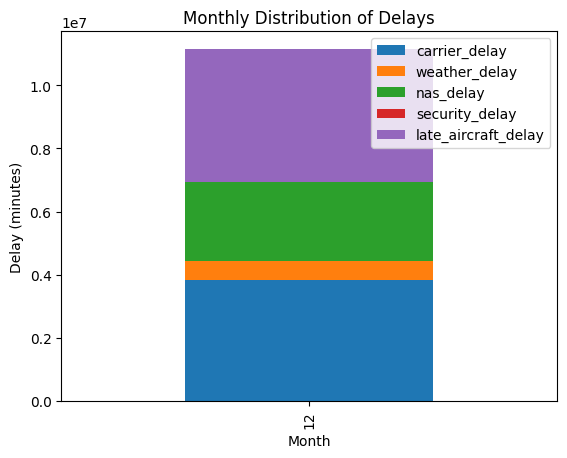

In [ ]:
#Monthly Distribution of Delays
monthly_delays = df.groupby('month')[delay_columns].sum()

plt.figure(figsize=(16, 8))
monthly_delays.plot(kind='bar', stacked=True)
plt.title('Monthly Distribution of Delays')
plt.xlabel('Month')
plt.ylabel('Delay (minutes)')
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_18420\1297146419.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)


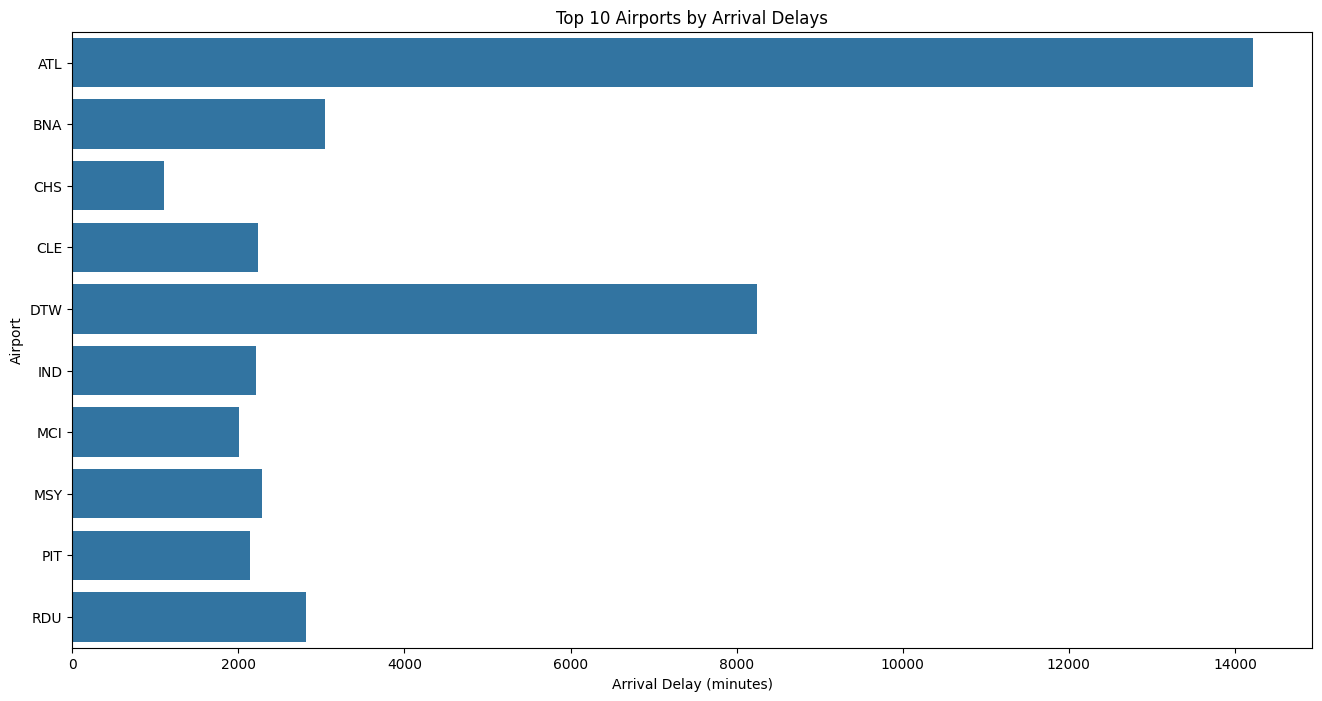

In [ ]:
#Airport-wise Delays
top_airports = df['airport'].value_counts().head(10).index

plt.figure(figsize=(16, 8))
sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)
plt.title('Top 10 Airports by Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Airport')
plt.show()

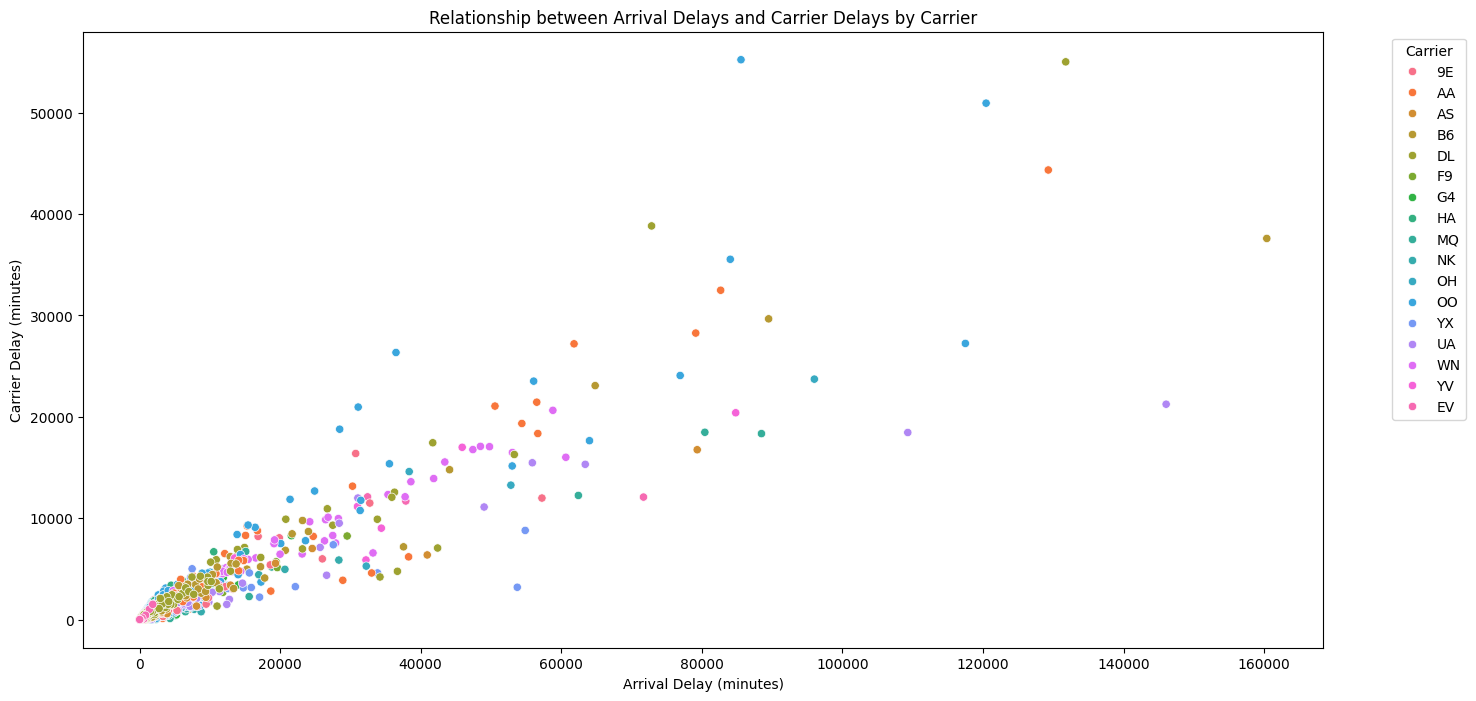

In [ ]:
#Relationship between Carrier Delays and Arrival Delays
plt.figure(figsize=(16, 8))
sns.scatterplot(x='arr_delay', y='carrier_delay', hue='carrier', data=df)
plt.title('Relationship between Arrival Delays and Carrier Delays by Carrier')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Carrier Delay (minutes)')
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_18420\3061503177.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)


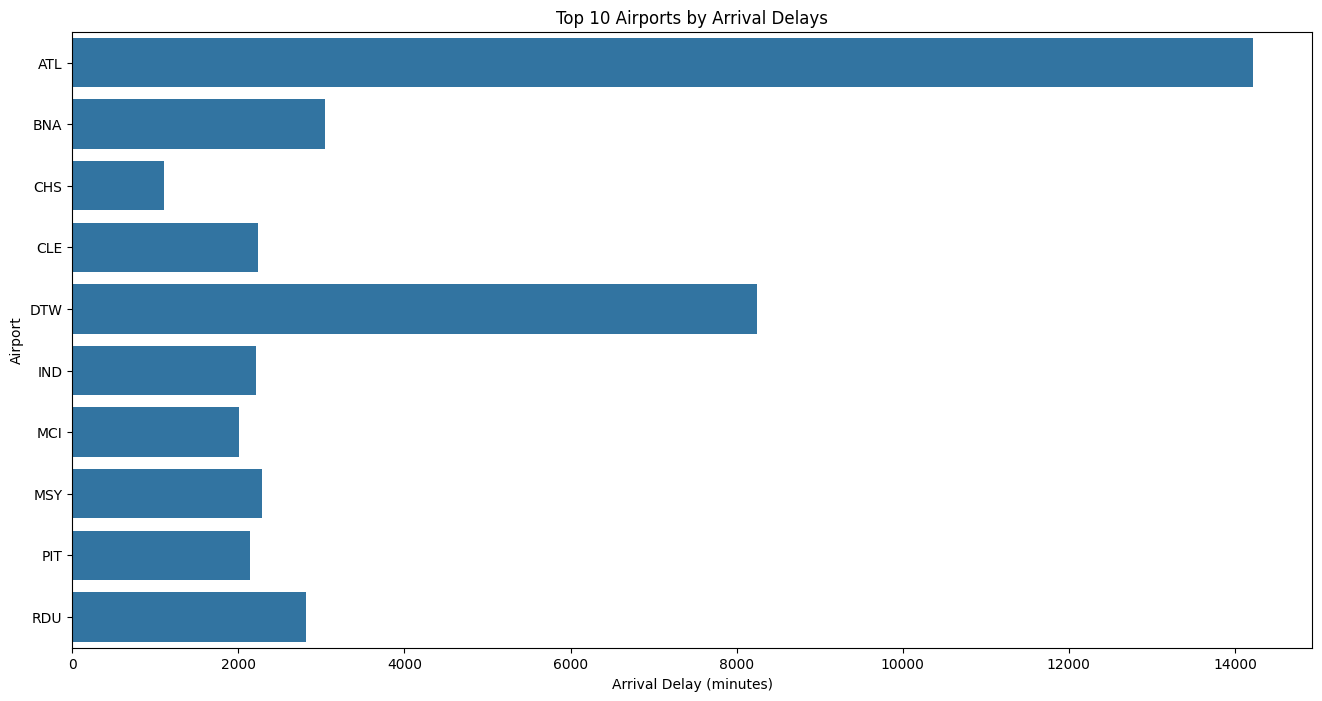

In [ ]:
#Airport-wise Delays
plt.figure(figsize=(16, 8))
sns.barplot(x='arr_delay', y='airport', data=df[df['airport'].isin(top_airports)], ci=None)
plt.title('Top 10 Airports by Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Airport')
plt.show()

In [ ]:
df_delay = df[['weather_delay', 'security_delay', 'nas_delay', 'late_aircraft_delay']].copy()
display(df_delay)

,weather_delay,security_delay,nas_delay,late_aircraft_delay
0,0.0,0.0,3.0,30.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,45.0,28.0
3,0.0,0.0,92.0,224.0
4,0.0,0.0,178.0,116.0
...,...,...,...,...
3346,19.0,0.0,135.0,34.0
3347,25.0,0.0,200.0,139.0
3348,46.0,0.0,50.0,0.0
3349,0.0,0.0,23.0,0.0


In [ ]:
#Carrier Performance
df_carr = df[['carrier_name', 'arr_flights', 'arr_del15', 'arr_delay']].copy()
carrier_groups = df_carr.groupby('carrier_name')
carr_metrix = carrier_groups.agg({'arr_del15': 'sum','arr_delay': 'sum','arr_flights': 'sum'})


In [ ]:
# Percentage of delayed flights
carr_metrix['Percentage_Delayed'] = (carr_metrix['arr_del15'] / carr_metrix['arr_flights']) * 100

# Average delay time
carr_metrix['Average_Delay_Time'] = carr_metrix['arr_delay'] / carr_metrix['arr_del15']

# Ranked df (based on percentage of delayed flights)
carrier_ranking = carr_metrix.sort_values(by='Percentage_Delayed', ascending=False)
carrier_ranking = pd.DataFrame(carrier_ranking)

display(carrier_ranking)

,arr_del15,arr_delay,arr_flights,Percentage_Delayed,Average_Delay_Time
carrier_name,,,,,
JetBlue Airways,10363.0,864790.0,36181.0,28.642105,83.449773
ExpressJet Airlines LLC,2694.0,254148.0,11203.0,24.047130,94.338530
Mesa Airlines Inc.,6359.0,530595.0,30502.0,20.847813,83.440006
Allegiant Air,3480.0,240714.0,16749.0,20.777360,69.170690
Alaska Airlines Inc.,6294.0,351035.0,33001.0,19.072149,55.772958
Frontier Airlines Inc.,3654.0,232696.0,19587.0,18.655231,63.682540
PSA Airlines Inc.,7162.0,479952.0,38567.0,18.570280,67.013683
Envoy Air,8070.0,505165.0,43914.0,18.376827,62.597893
United Air Lines Inc.,13498.0,903789.0,77183.0,17.488307,66.957253


C:\Users\S\AppData\Local\Temp\ipykernel_18420\690605169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Percentage_Delayed'], palette = 'Accent')


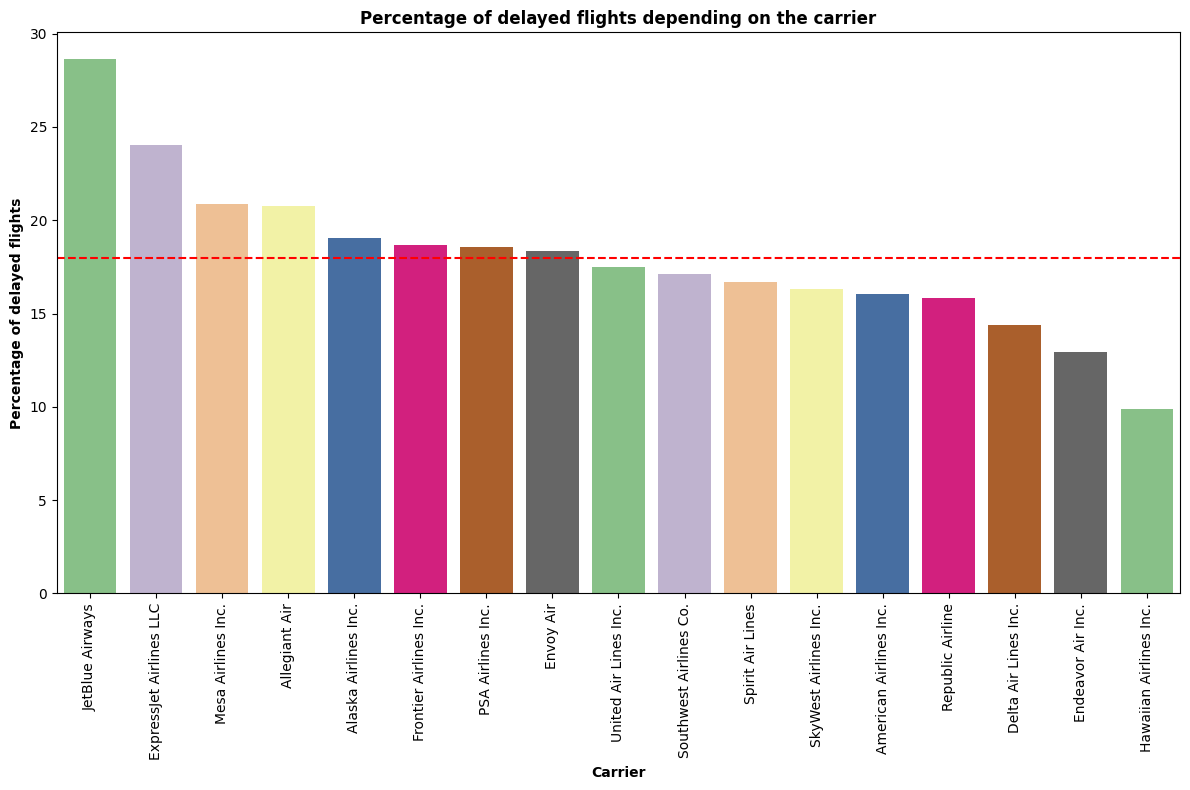

Mean Percentage of delayed flights: 17.98


In [ ]:
#Delayed flights depending on the carrier
plt.figure(figsize = (12,8))
sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Percentage_Delayed'], palette = 'Accent')

# Horizontal line (overall average)
mean_perc_del = carrier_ranking['Percentage_Delayed'].mean()
plt.axhline(y=mean_perc_del, color='red', linestyle='--', label=f'Mean: {mean_perc_del:.2f}')


plt.title('Percentage of delayed flights depending on the carrier', fontweight = 'bold')
plt.ylabel('Percentage of delayed flights', fontweight = 'bold')
plt.xlabel('Carrier', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
print('Mean Percentage of delayed flights:', carrier_ranking['Percentage_Delayed'].mean().round(2))

C:\Users\S\AppData\Local\Temp\ipykernel_18420\2715353739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Average_Delay_Time'], palette = 'husl')


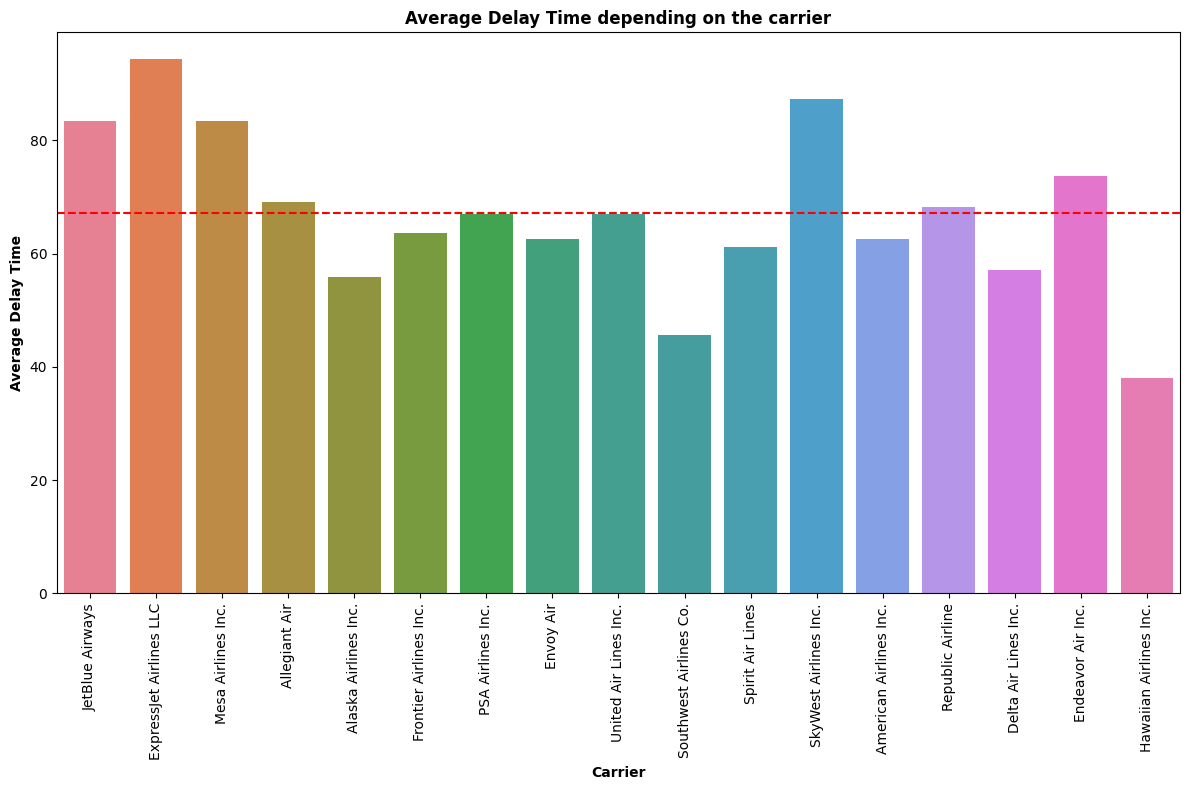

Overall Average Delay Time: 67.07


In [ ]:
#overall career delay time
plt.figure(figsize = (12,8))

sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Average_Delay_Time'], palette = 'husl')
plt.xticks(rotation = 90)

# Horizontal line (overall average)
mean_avg_delay_time = carrier_ranking['Average_Delay_Time'].mean()
plt.axhline(y=mean_avg_delay_time, color='red', linestyle='--', label=f'Mean: {mean_avg_delay_time:.2f}')

plt.title('Average Delay Time depending on the carrier', fontweight = 'bold')
plt.ylabel('Average Delay Time', fontweight = 'bold')
plt.xlabel('Carrier', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print('Overall Average Delay Time:', carrier_ranking['Average_Delay_Time'].mean().round(2))

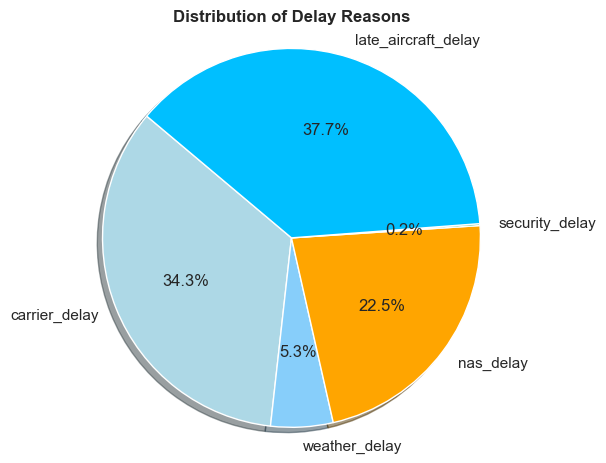

late_aircraft_delay    4200591
carrier_delay          3826943
nas_delay              2505844
weather_delay           593688
security_delay           18055
dtype: int32

In [ ]:
# Dealy reason Piechart
delay_reasons = df[delay_columns].sum()
labels = delay_reasons.index  # Assuming delay reasons are the index of delay_reasons DataFrame
sizes = delay_reasons
colors = ['lightblue', 'lightskyblue', 'orange', 'mediumseagreen', 'deepskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Delay Reasons', fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

display(delay_reasons.sort_values(ascending=False).astype(int))
